# imports

In [100]:
# install sktime
!pip install sktime
!pip install seaborn
!pip install joblib
!pip install numba

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/98/59/96974273437b61fd4bf5ccd36c6e80e1baa3440191e8c21521d713b28fbb/numba-0.58.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/88/31/eabea2883e23472ba17e3ff6bc29e37863c47a2e2fbab8e2dc6ae7b51d68/llvmlite-0.41.0-cp310-cp310-win_amd64.whl.metadata
Using cached numba-0.58.0-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached llvmlite-0.41.0-cp310-cp310-win_amd64.whl (28.1 MB)


In [119]:
from sktime.classification.kernel_based import RocketClassifier
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os

# Data Preprocessing

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
plt.rcParams["figure.figsize"] = 16, 10

In [47]:
X_train = pd.read_csv("train_data/EDA_lior_1_results.csv")
Y_train = pd.read_csv("train_data/EDA_lior_1.csv")

In [48]:
X_train.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
0,0,0,00:00:00,2023-07-11,18:45:49,7,108.180417,2,0.0,0.741361,...,1.627440,0.333549,0,0,28.3,0.000000,28.3,NaN,0,NaN
1,1,0,00:00:01,2023-07-11,18:45:50,7,108.187102,2,0.0,1.589656,...,1.627440,0.763398,0,0,28.4,0.005137,28.4,NaN,0,NaN
2,2,0,00:00:02,2023-07-11,18:45:51,7,108.189142,2,0.0,1.539177,...,1.627440,0.203713,0,0,28.4,-0.002569,28.4,NaN,0,NaN
3,3,0,00:00:03,2023-07-11,18:45:52,7,108.184682,2,0.0,1.128682,...,1.627440,0.071002,0,0,28.4,-0.014782,28.4,NaN,0,NaN
4,4,0,00:00:04,2023-07-11,18:45:53,7,108.173580,2,0.0,0.674075,...,0.507738,0.044330,0,0,28.4,-0.041928,28.4,NaN,0,NaN


In [49]:
Y_train.head()

,Segment id,label
0,0,no
1,1,no
2,2,no
3,3,no
4,4,no


### Encoding the labels

In [50]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(Y_train.label)
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [51]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

In [52]:
Y_train["encoded_label"] = encoded_labels

In [53]:
Y_train.head()

,Segment id,label,encoded_label
0,0,no,0
1,1,no,0
2,2,no,0
3,3,no,0
4,4,no,0


In [67]:
FEATURE_COLUMNS = X_train.columns.tolist()[8:9]
FEATURE_COLUMNS

['EdaArousalMean []']

In [55]:
 X_train.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
0,0,0,00:00:00,2023-07-11,18:45:49,7,108.180417,2,0.0,0.741361,...,1.627440,0.333549,0,0,28.3,0.000000,28.3,NaN,0,NaN
1,1,0,00:00:01,2023-07-11,18:45:50,7,108.187102,2,0.0,1.589656,...,1.627440,0.763398,0,0,28.4,0.005137,28.4,NaN,0,NaN
2,2,0,00:00:02,2023-07-11,18:45:51,7,108.189142,2,0.0,1.539177,...,1.627440,0.203713,0,0,28.4,-0.002569,28.4,NaN,0,NaN
3,3,0,00:00:03,2023-07-11,18:45:52,7,108.184682,2,0.0,1.128682,...,1.627440,0.071002,0,0,28.4,-0.014782,28.4,NaN,0,NaN
4,4,0,00:00:04,2023-07-11,18:45:53,7,108.173580,2,0.0,0.674075,...,0.507738,0.044330,0,0,28.4,-0.041928,28.4,NaN,0,NaN


In [56]:
# Select the desired columns
selected_columns = ['Segment id', 'EdaArousalMean []', 'EdaSclMean [uS]', 'EdaScrAmplitudesMean [uS]']
df = pd.DataFrame(X_train)
X_data = df[selected_columns]
X_data.head()

,Segment id,EdaArousalMean [],EdaSclMean [uS],EdaScrAmplitudesMean [uS]
0,0,0.0,0.741361,0.0
1,0,0.0,1.589656,0.0
2,0,0.0,1.539177,0.0
3,0,0.0,1.128682,0.0
4,0,0.0,0.674075,0.0


In [75]:
# Merge the data and labels based on the 'series_id' column
merged_data = pd.merge(X_data, Y_train, on='Segment id')
merged_data

,Segment id,EdaArousalMean [],EdaSclMean [uS],EdaScrAmplitudesMean [uS],label,encoded_label
0,0,0.000000e+00,0.741361,0.000000,no,0
1,0,0.000000e+00,1.589656,0.000000,no,0
2,0,0.000000e+00,1.539177,0.000000,no,0
3,0,0.000000e+00,1.128682,0.000000,no,0
4,0,0.000000e+00,0.674075,0.000000,no,0
...,...,...,...,...,...,...
955,47,2.872370e-09,1.291220,0.000000,no,0
956,47,1.043517e-01,1.270535,0.336388,no,0
957,47,3.047191e-01,1.243577,0.000000,no,0
958,47,2.377635e-01,1.253299,0.000000,no,0


In [76]:
# Remove all the data before experiment start
merged_data_start = merged_data[120:]
merged_data_start

,Segment id,EdaArousalMean [],EdaSclMean [uS],EdaScrAmplitudesMean [uS],label,encoded_label
120,6,7.326261e-01,6.388704,0.000000,no,0
121,6,5.705698e-01,6.687354,0.000000,no,0
122,6,4.443602e-01,6.989779,0.000000,no,0
123,6,3.460681e-01,7.145787,0.000000,no,0
124,6,2.695181e-01,7.146281,0.000000,no,0
...,...,...,...,...,...,...
955,47,2.872370e-09,1.291220,0.000000,no,0
956,47,1.043517e-01,1.270535,0.336388,no,0
957,47,3.047191e-01,1.243577,0.000000,no,0
958,47,2.377635e-01,1.253299,0.000000,no,0


In [106]:
# Extract the measuremens columns as time series data
X_custom = merged_data_start.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom

array([list([0.732626147, 0.570569817, 0.44436022, 0.346068088, 0.269518098, 0.209900905, 0.177399313, 0.405005437, 0.750036689, 0.955810487, 0.744385956, 0.579728365, 0.451492905, 0.351623028, 0.273844289, 0.213270147, 0.166094957, 0.129354883, 0.100741684, 0.078457702]),
       list([0.06110292, 0.163063374, 1.135031661, 0.980113315, 0.764270813, 0.595214708, 0.463553681, 0.361015969, 0.28115952, 0.218967254, 0.170531869, 0.132810353, 0.103432807, 0.080553551, 0.062735169, 0.048858198, 0.038050803, 0.029633995, 0.023078979, 0.017973927]),
       list([0.013998108, 0.010901738, 0.008490282, 0.006612238, 0.005149616, 0.004010525, 0.0031234, 0.002432506, 0.001894438, 0.00147539, 0.001149035, 0.000894869, 0.000696925, 0.000542766, 0.000422706, 0.000329204, 0.000256384, 0.000199672, 0.000155505, 0.000121107]),
       list([9.43185e-05, 7.34553e-05, 5.72071e-05, 4.45529e-05, 3.46978e-05, 2.70227e-05, 2.10453e-05, 1.63901e-05, 1.27646e-05, 9.9411e-06, 7.74213e-06, 6.02958e-06, 4.69584e-06, 

In [95]:
# Extract the 'label' column as labels
Y_custom = Y_train["encoded_label"].values
Y_custom = Y_custom[6:]
Y_custom

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [109]:
# Convert X_custom to a 2D NumPy array
X_custom_np = np.vstack(X_custom)
X_custom_np

array([[7.32626147e-01, 5.70569817e-01, 4.44360220e-01, 3.46068088e-01,
        2.69518098e-01, 2.09900905e-01, 1.77399313e-01, 4.05005437e-01,
        7.50036689e-01, 9.55810487e-01, 7.44385956e-01, 5.79728365e-01,
        4.51492905e-01, 3.51623028e-01, 2.73844289e-01, 2.13270147e-01,
        1.66094957e-01, 1.29354883e-01, 1.00741684e-01, 7.84577020e-02],
       [6.11029200e-02, 1.63063374e-01, 1.13503166e+00, 9.80113315e-01,
        7.64270813e-01, 5.95214708e-01, 4.63553681e-01, 3.61015969e-01,
        2.81159520e-01, 2.18967254e-01, 1.70531869e-01, 1.32810353e-01,
        1.03432807e-01, 8.05535510e-02, 6.27351690e-02, 4.88581980e-02,
        3.80508030e-02, 2.96339950e-02, 2.30789790e-02, 1.79739270e-02],
       [1.39981080e-02, 1.09017380e-02, 8.49028200e-03, 6.61223800e-03,
        5.14961600e-03, 4.01052500e-03, 3.12340000e-03, 2.43250600e-03,
        1.89443800e-03, 1.47539000e-03, 1.14903500e-03, 8.94869000e-04,
        6.96925000e-04, 5.42766000e-04, 4.22706000e-04, 3.2920

In [110]:
# Create and train the RocketClassifier
clf = RocketClassifier(num_kernels=500)
clf.fit(X_custom_np, Y_custom)

RocketClassifier(num_kernels=500)

In [122]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'eda_rocket_model.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(clf, full_model_path)

['./model/eda_rocket_model.pkl']

# Load the trained model and test it

# Lior 1st experiment segment lables

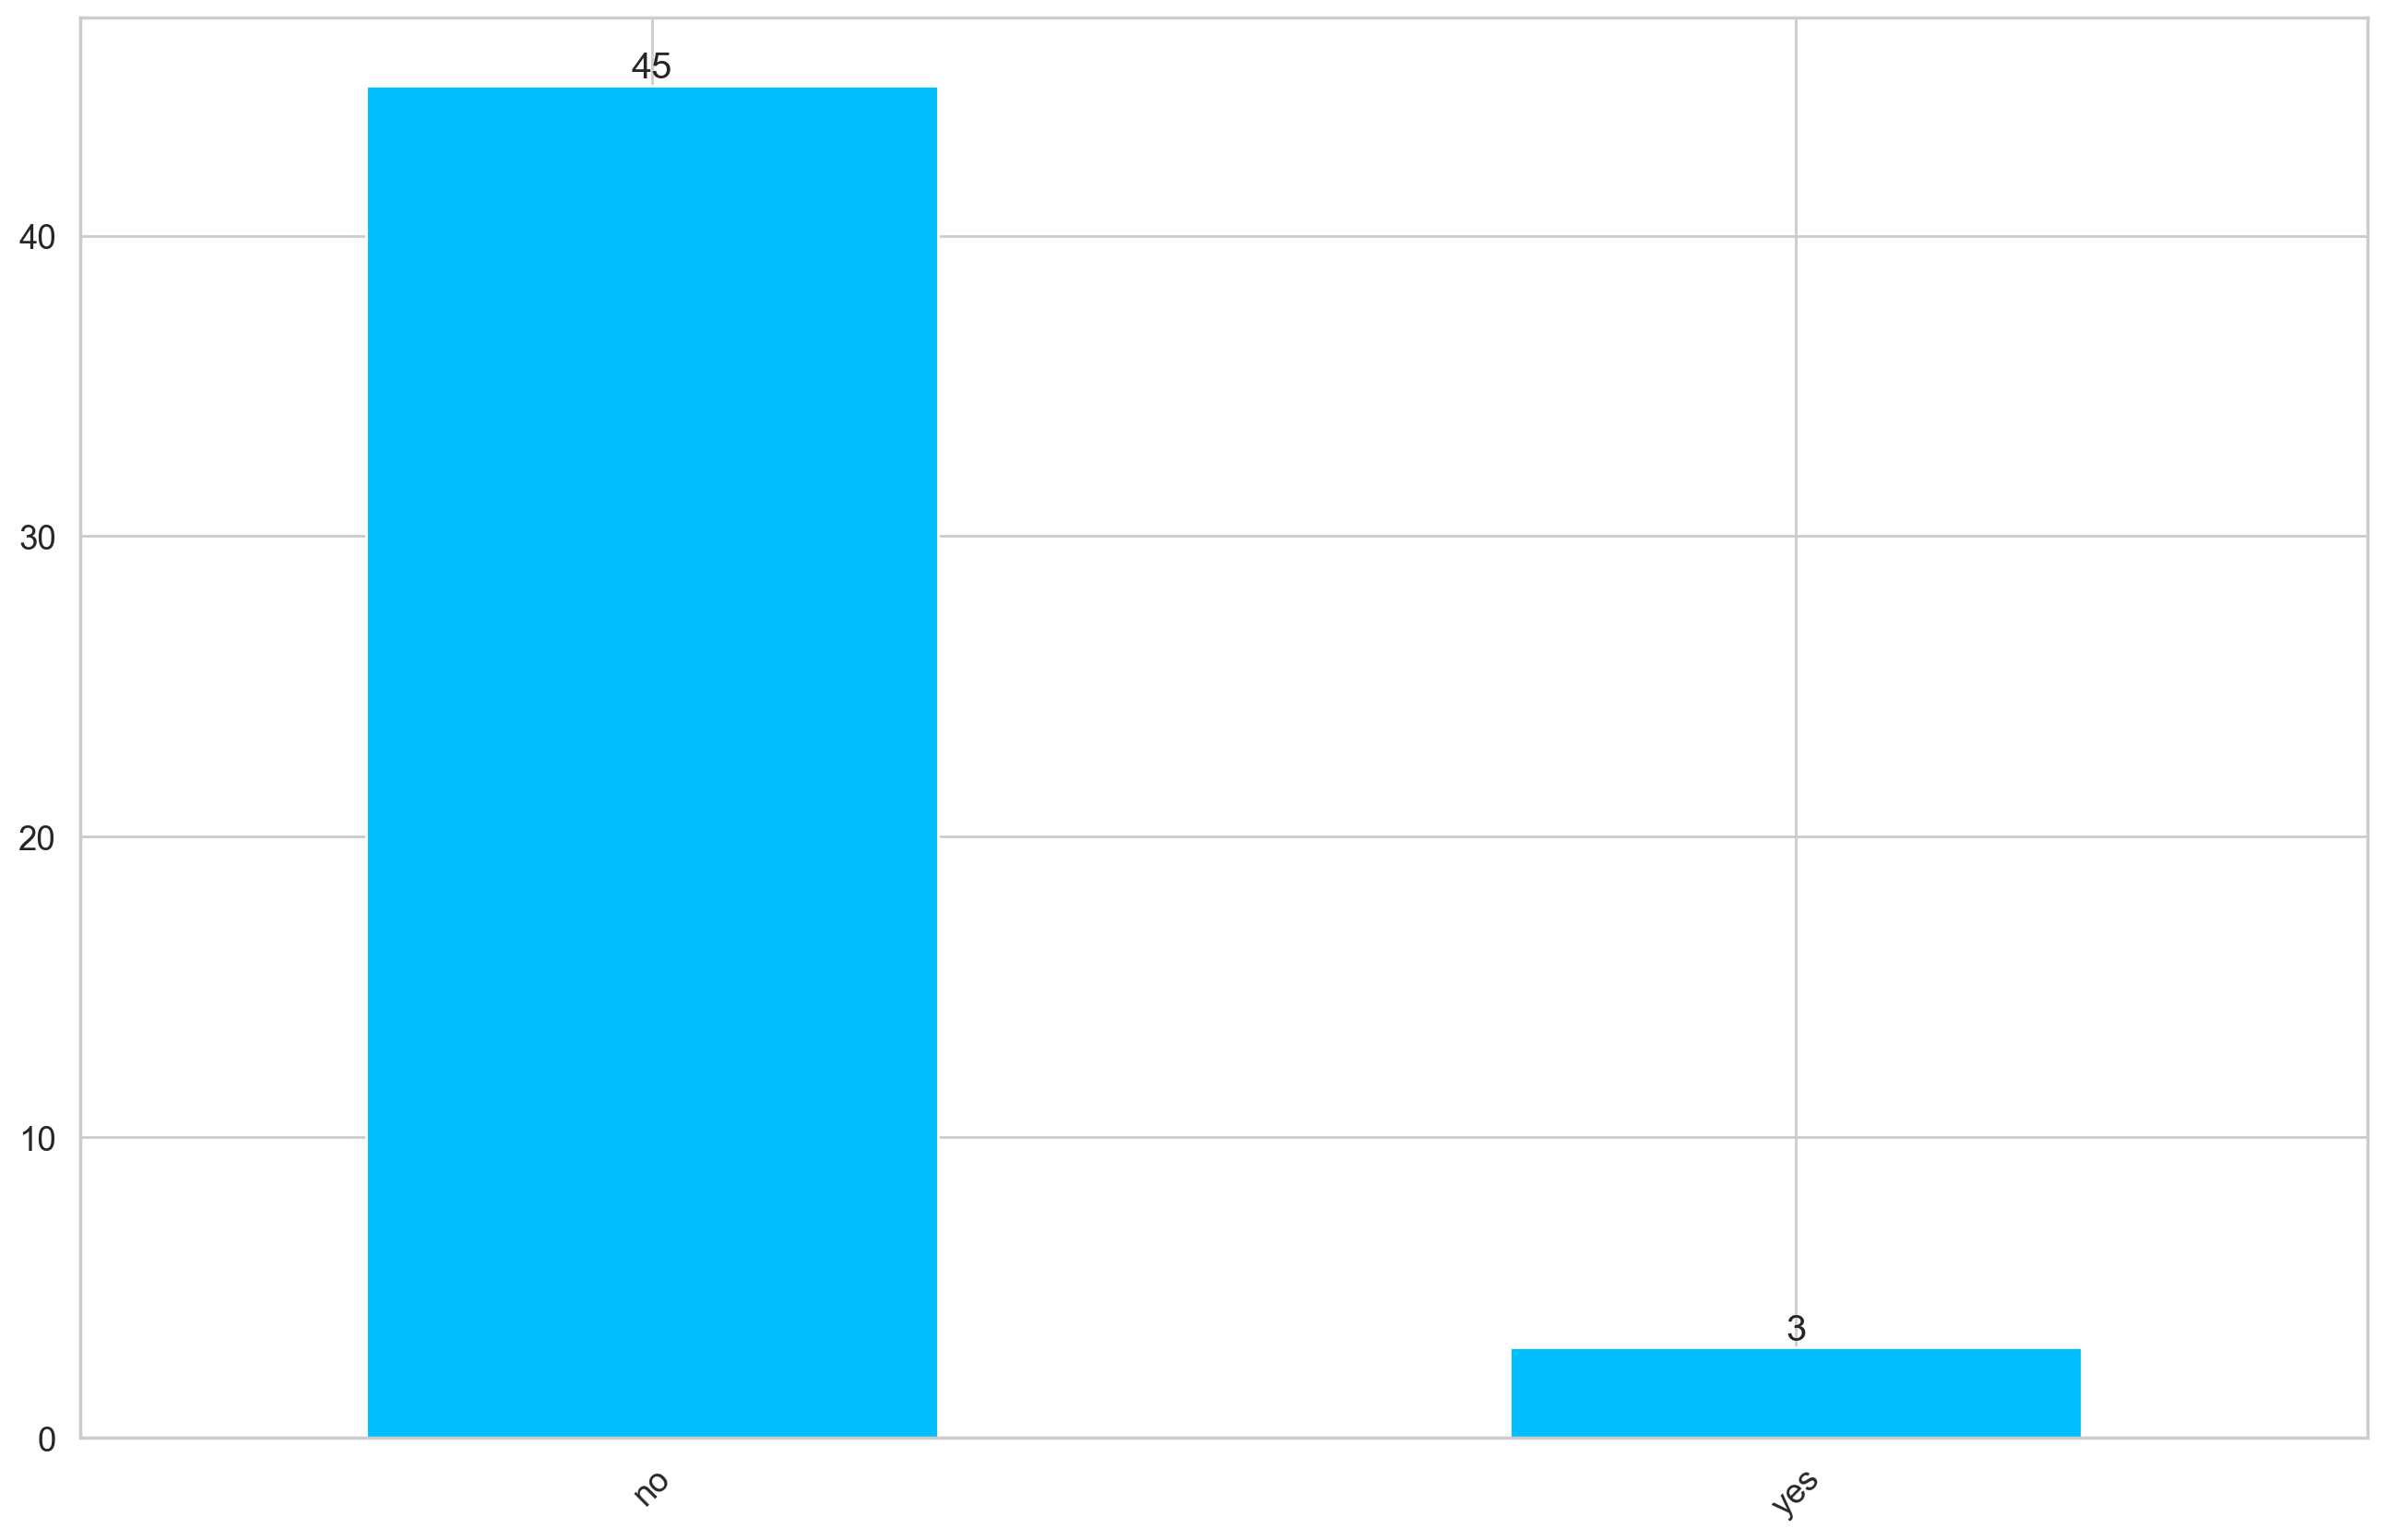

In [28]:
ay = Y_train.label.value_counts().plot(kind="bar")
# Add labels to the bars
for p in ay.patches:
    ay.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()